In [23]:
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Naman\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [4]:
df = pd.read_csv('./data/spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
df['text'] = df['text'].apply(lambda x: x.replace('\r\n', ' '))

In [6]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291 thi...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001 ( see at...",0
2,3624,ham,"Subject: neon retreat ho ho ho , we ' re aroun...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs this deal is to b...,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [10]:
stemmer = PorterStemmer()
corpus = []

stopwords_set = set(stopwords.words('english'))

for i in range(len(df)):
    text = df['text'].iloc[i].lower()
    text = text.translate(str.maketrans('', '', string.punctuation)).split()
    text = [stemmer.stem(word) for word in text if word not in stopwords_set]
    text = ' '.join(text)
    corpus.append(text)

In [12]:
df['text'].iloc[0]

"Subject: enron methanol ; meter # : 988291 this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary flow data provided by daren } . please override pop ' s daily volume { presently zero } to reflect daily activity you can obtain from gas control . this change is needed asap for economics purposes ."

In [13]:
corpus[0]

'subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos'

In [14]:
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus).toarray()
y = df.label_num

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
clf = RandomForestClassifier(n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [16]:
clf.score(X_test, y_test)

0.9729468599033816

In [17]:
email_to_classify = df.text.values[10]

In [18]:
email_to_classify

"Subject: vocable % rnd - word asceticism vcsc - brand new stock for your attention vocalscape inc - the stock symbol is : vcsc vcsc will be our top stock pick for the month of april - stock expected to bounce to 12 cents level the stock hit its all time low and will bounce back stock is going to explode in next 5 days - watch it soar watch the stock go crazy this and next week . breaking news - vocalscape inc . announces agreement to resell mix network services current price : $ 0 . 025 we expect projected speculative price in next 5 days : $ 0 . 12 we expect projected speculative price in next 15 days : $ 0 . 15 vocalscape networks inc . is building a company that ' s revolutionizing the telecommunications industry with the most affordable phone systems , hardware , online software , and rates in canada and the us . vocalscape , a company with global reach , is receiving international attention for the development of voice over ip ( voip ) application solutions , including the award 

In [19]:
email_text = email_to_classify.lower().translate(str.maketrans('', '', string.punctuation)).split()
email_text = [stemmer.stem(word) for word in text if word not in stopwords_set]
email_text = ' '.join(email_text)

email_corpus = [email_text]

X_email = vectorizer.transform(email_corpus)
clf.predict(X_email)

array([1])

In [20]:
df.label_num.iloc[10]

np.int64(1)

In [21]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, cv=5).mean()

np.float64(0.9740840411515712)

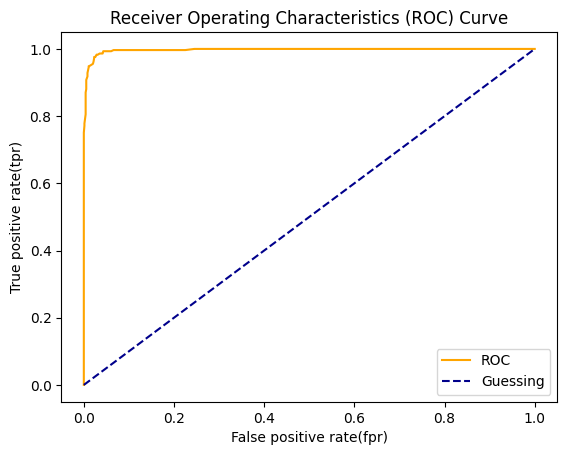

In [24]:
from sklearn.metrics import roc_curve
y_probs = clf.predict_proba(X_test)
y_probs_positive = y_probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
def plot_roc(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate(fpr) and true positive rate(tpr)
    """

    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    
    # Plot line with no predictive power(baseline)
    plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='Guessing')

    # Customize plot
    plt.xlabel('False positive rate(fpr)')
    plt.ylabel('True positive rate(tpr)')
    plt.title('Receiver Operating Characteristics (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc(fpr,tpr)

In [25]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

np.float64(0.9969320073963001)

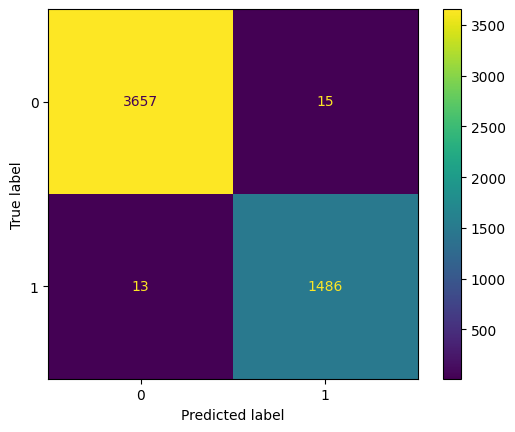

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       742
           1       0.95      0.96      0.95       293

    accuracy                           0.97      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035

